# Regional PlateCarree projection

The "Physics of the climate system" final projects ask may bring you to focus on one specific region. In the few lines of code below you find some examples to get you started. These examples are valid for continents or regions not too far from the equator.

First, the imports. They are the same as always, but I removed the figure size defaults:

In [10]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
np.set_printoptions(threshold=20)  # avoid to print very large arrays on screen

## Read and select the regional data

Reading the data works as allways:

In [3]:
ds = xr.open_dataset('../data/ERA5_LowRes_Invariant.nc')

To select the data for a specific region, we will use xray's ``sel`` function as we learned it in the exercises. I've made a pre-selection for you but you are free to make the domain bigger/smaller if you find it useful for your analyses! Just **uncomment the two lines relevant for your case**:

In [4]:
# # Africa
# netcdf = ds.sel(latitude=slice(45, -40), longitude=slice(-25, 55))
# plt.rcParams['figure.figsize'] = (9, 7)

# # South-America
ds = ds.sel(latitude=slice(20, -60), longitude=slice(-100, -30))
plt.rcParams['figure.figsize'] = (9, 7)

# # Australia, New-Zealand, Indonesia
# netcdf = ds.sel(latitude=slice(15, -55), longitude=slice(105, 180))
# plt.rcParams['figure.figsize'] = (9, 6.5)

# # South-Asia
# netcdf = ds.sel(latitude=slice(50, 0), longitude=slice(50, 110))
# plt.rcParams['figure.figsize'] = (11, 7)

Note that I set the standard figure size for each region. You can allways change those, and also make plots of any size later on (examples below).

Now we read the variable:

In [5]:
z = ds.z / 9.81

## Plot the data

Plotting the data works the exact same way as during the exercises:

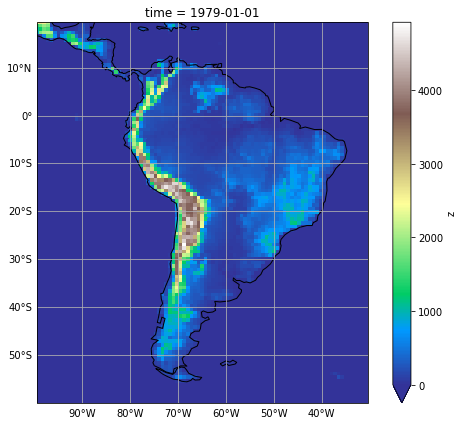

In [11]:
ax = plt.axes(projection=ccrs.PlateCarree())
z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain') 
ax.coastlines();  
# We add tick labels to the plot, this will help you in your descriptions:
xl = ax.gridlines(draw_labels=True);
xl.top_labels = False
xl.right_labels = False
# We set the extent of the map
extent = [ds.longitude.min(), ds.longitude.max(), ds.latitude.min(), ds.latitude.max()]
ax.set_extent(extent, crs=ccrs.PlateCarree())

## Change some details 

The plot above looks fine for me. If you want you can change some details for it, for example its size:

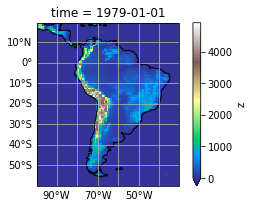

In [9]:
# Prepare the figure with the wanted size:
fig = plt.figure(figsize=(5, 3))
# The rest doesn't change:
ax = plt.axes(projection=ccrs.PlateCarree())
z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain') 
ax.coastlines();
xl = ax.gridlines(draw_labels=True);
xl.top_labels = False
xl.right_labels = False
ax.set_extent(extent, crs=ccrs.PlateCarree())

Or you can add country borders if you wish:

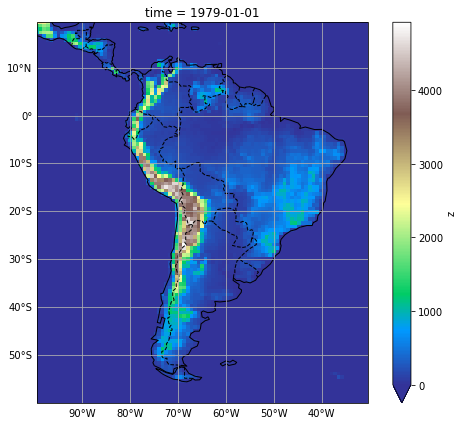

In [12]:
ax = plt.axes(projection=ccrs.PlateCarree())
z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain') 
ax.coastlines();
xl = ax.gridlines(draw_labels=True);
xl.top_labels = False
xl.right_labels = False
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
ax.set_extent(extent, crs=ccrs.PlateCarree())

**OK, you should be good now!**

## Tired of writing so many lines?

Note that it is possible to simplify your plotting commands by writing a **function**:

In [13]:
def prepare_plot(figsize=None):
    """This function returns prepared axes for the regional plot.
    
    Usage:
        fig, ax = prepare_plot()
    """
    fig = plt.figure(figsize=figsize)
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines();
    xl = ax.gridlines(draw_labels=True);
    xl.top_labels = False
    xl.right_labels = False
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    return fig, ax

Now, making a plot has become even easier:

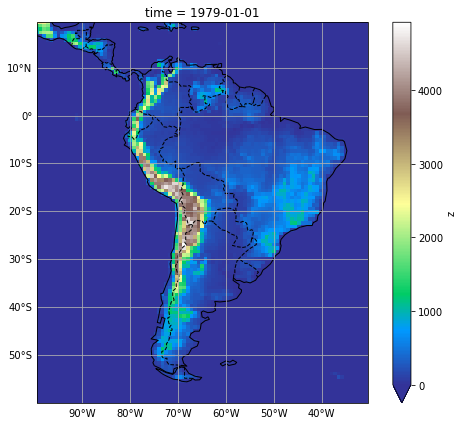

In [14]:
fig, ax = prepare_plot()
z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain');

## Need to save the plot for your presentation?

**The easiest way is to use "right-click -> save as" on the image in the notebook.**

Also, you can save the plot as pdf or png quite easily (examples below). But this might look quite different as the picture on screen sometimes...

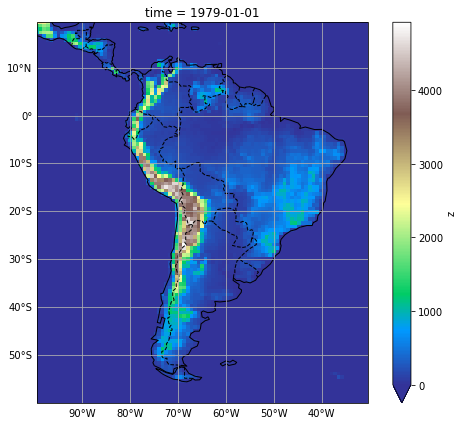

In [15]:
fig, ax = prepare_plot()
z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain');
plt.savefig('topo.pdf')

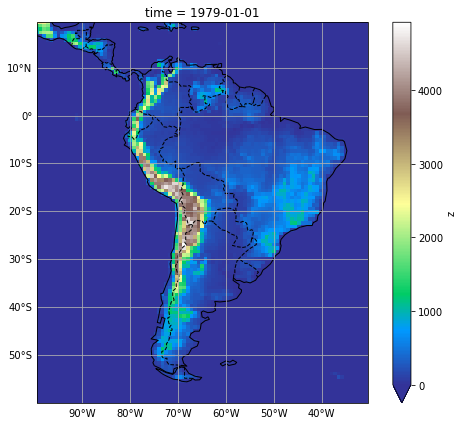

In [16]:
fig, ax = prepare_plot()
z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain');
plt.savefig('topo.png')